# Retail Store Sales Analysis

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import/Read CSV File

In [2]:
df = pd.read_csv('retail_store_sales.csv')

#### First 5 Rows

In [3]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


#### Last 5 Rows

In [4]:
df.tail()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True
12574,TXN_2407494,CUST_23,Food,Item_9_FOOD,17.0,3.0,51.0,Cash,Online,2022-08-06,NaN


#### Overview of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


In [7]:
df.shape

(12575, 11)

In [8]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied'],
      dtype='object')

#### Check For Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

#### Convert Transaction Date to Datetime format

In [10]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

#### Check for Missing Values

In [11]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

#### Fill Missing Values

In [12]:
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Total Spent']/df['Quantity'])

In [13]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())

In [14]:
df['Total Spent'] = df['Total Spent'].fillna(df['Price Per Unit']*df['Quantity'])

In [15]:
df['Discount Applied'] = df['Discount Applied'].fillna('Unknown')

In [16]:
df['Item'] = df['Item'].fillna(
    df.groupby('Category')['Item'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown_Item')
)

In [17]:
df.isnull().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64

#### Set Transaction ID as Index

In [18]:
df.set_index('Transaction ID', inplace = True)

#### Find Outliers using Boxplot

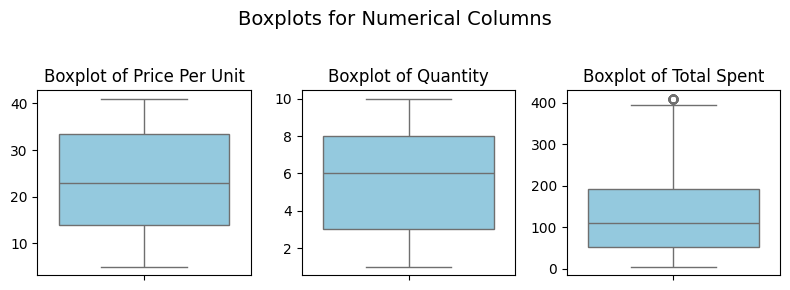

In [19]:
numerical_cols = ['Price Per Unit', 'Quantity', 'Total Spent']

plt.figure(figsize=(8, 3))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle("Boxplots for Numerical Columns", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Remove an outlier from Total Spent Column

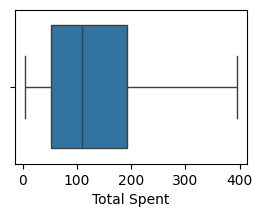

In [20]:
Q1 = df['Total Spent'].quantile(0.25)
Q3 = df['Total Spent'].quantile(0.75)
IQR = Q3 - Q1

Lower = Q1 - IQR*1.5
Upper = Q3 + IQR*1.5

df = df[(df['Total Spent'] > Lower) & (df['Total Spent'] < Upper)]
plt.figure(figsize=(3,2))
sns.boxplot(data = df,x = 'Total Spent')
plt.show()

## Exploratory Data Analysis (EDA)

#### Top 10 Demand Products

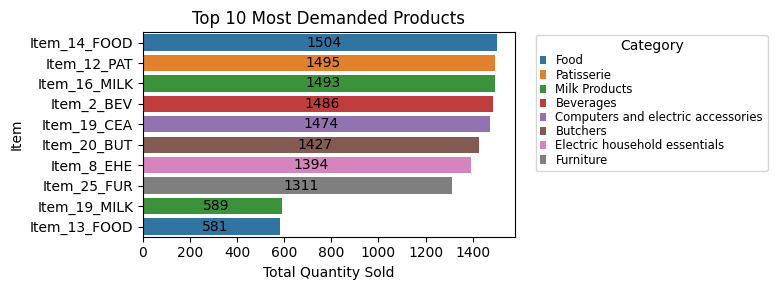

In [21]:
product_demand = (df.groupby(['Category', 'Item'])['Quantity'].sum()
    .reset_index()
    .sort_values(by='Quantity', ascending=False)
)

top_demand = product_demand.head(10)

plt.figure(figsize=(8, 3))
ax= sns.barplot(data=top_demand, x='Quantity', y='Item', hue='Category', dodge=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center', padding=3)

plt.title("Top 10 Most Demanded Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Item")
plt.legend(title='Category',bbox_to_anchor=(1.05, 1),loc='upper left',fontsize='small',title_fontsize='medium', 
    markerscale=0.5,          
    labelspacing=0.1,         
    handlelength=0.5,         
    borderaxespad=0.2       
)
plt.tight_layout()
plt.show()

#### Revenue by Category

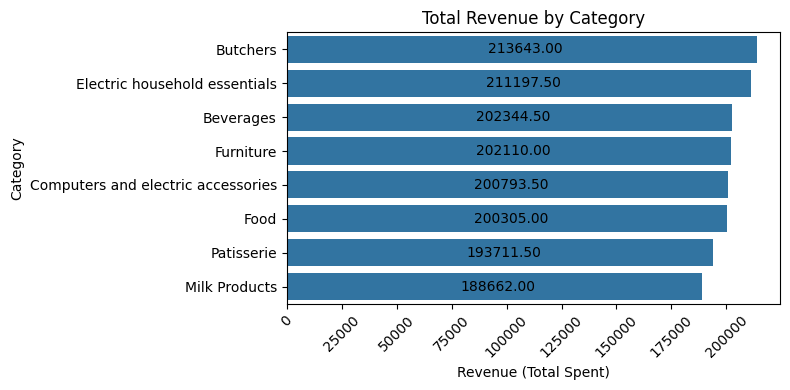

In [22]:
revenue_by_category = (df.groupby('Category')['Total Spent'].sum()
        .reset_index()
        .sort_values(by='Total Spent', ascending=False)
)

plt.figure(figsize=(8, 4))

ax = sns.barplot(data=revenue_by_category, x='Total Spent', y='Category')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', padding=3)

plt.title("Total Revenue by Category")
plt.xlabel("Revenue (Total Spent)")
plt.ylabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Revenue by Customer

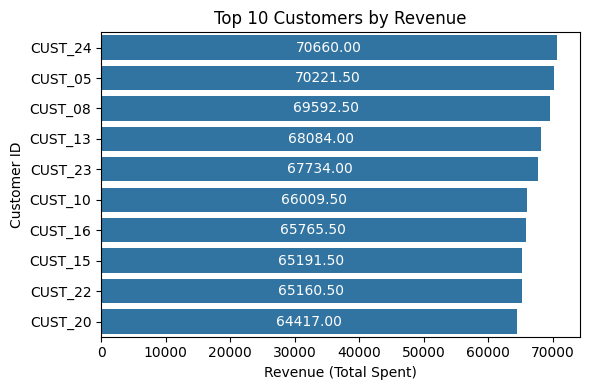

In [23]:
revenue_by_customer = df.groupby('Customer ID')['Total Spent'].sum().reset_index().sort_values(by='Total Spent', ascending=False)

top_customers = revenue_by_customer.head(10)

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=top_customers, x='Total Spent', y='Customer ID')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color='white')

plt.title("Top 10 Customers by Revenue")
plt.xlabel("Revenue (Total Spent)")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()

#### Most used Payment Method

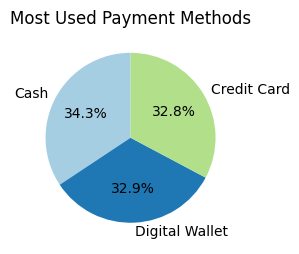

In [24]:
payment_counts = df['Payment Method'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(payment_counts,labels=payment_counts.index,
    autopct='%1.1f%%',      # show percent
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title("Most Used Payment Methods")
plt.tight_layout()
plt.show()

#### Count of Discount Applied

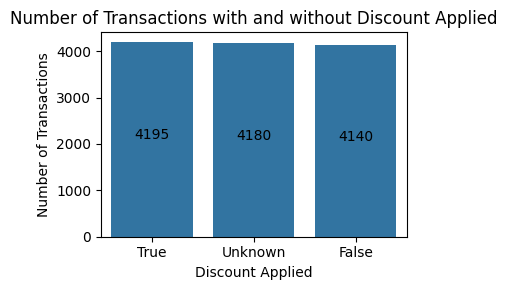

In [25]:
discount_counts = df['Discount Applied'].value_counts().reset_index()
discount_counts.columns = ['Discount Applied', 'Count']

plt.figure(figsize=(4, 3))
ax = sns.barplot(data=discount_counts, x='Discount Applied', y='Count')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', padding=3)

plt.title("Number of Transactions with and without Discount Applied")
plt.xlabel("Discount Applied")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()

#### Sales Trend by Month & Year

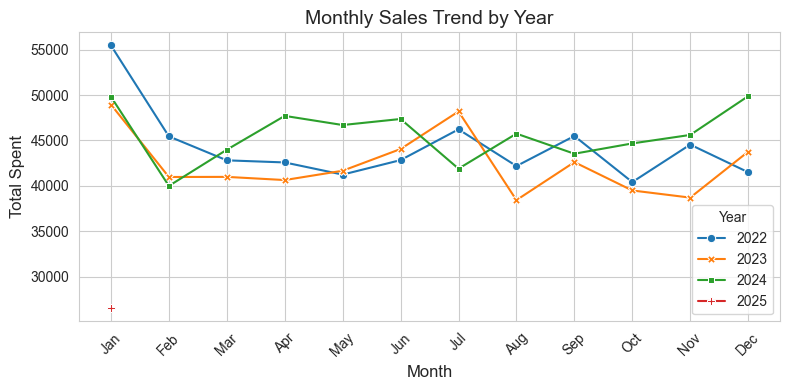

In [26]:
# Extract Year, Month, Month Name
df['Year'] = df['Transaction Date'].dt.year
df['Month'] = df['Transaction Date'].dt.month
df['Month_Name'] = df['Transaction Date'].dt.strftime('%b')  # Jan, Feb, etc.

# Sort months for correct order in charts
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Group by Year and Month
monthly_sales = df.groupby(['Year', 'Month', 'Month_Name'])['Total Spent'].sum().reset_index()

# Sort by month number to maintain correct order
monthly_sales = monthly_sales.sort_values(by=['Year', 'Month'])

# Pivot for plotting
pivot_df = monthly_sales.pivot(index='Month_Name', columns='Year', values='Total Spent')
pivot_df = pivot_df.reindex(month_order)  # Ensure month order

plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")
ax = sns.lineplot(data=pivot_df, markers=True, dashes=False)
ax.set_title('Monthly Sales Trend by Year', fontsize=14)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Total Spent', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()